In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

filtered_data_FSO = data_FSO

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO

,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,WindSpeedMin,SYNOPCode_0,SYNOPCode_3,SYNOPCode_4,SYNOPCode_5,SYNOPCode_6,SYNOPCode_7,SYNOPCode_8,sin_time,cos_time
0,7.913289,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,0.0,...,3.007939,1,0,0,0,0,0,0,0.707107,-0.707107
1,7.451176,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,0.0,...,2.537393,1,0,0,0,0,0,0,0.707107,-0.707107
2,7.072747,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,0.0,...,1.640809,1,0,0,0,0,0,0,0.500000,-0.866025
3,6.949288,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,0.0,...,0.886951,1,0,0,0,0,0,0,0.500000,-0.866025
4,7.361052,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,0.0,...,1.874052,1,0,0,0,0,0,0,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1,0,0,0,0,0,0,0.866025,0.500000
91375,9.333777,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,0.0,...,0.069834,1,0,0,0,0,0,0,0.866025,0.500000
91376,8.873168,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,0.0,...,0.049824,1,0,0,0,0,0,0,0.866025,0.500000
91377,9.538886,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,0.0,...,0.413146,1,0,0,0,0,0,0,0.965926,0.258819


In [3]:
# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO


In [4]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.3, random_state=42)


### MLP test

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import Hyperband
from sklearn.model_selection import train_test_split

# Data preparation for FSO
X_FSO = df_FSO.drop('FSO_Att', axis=1)
y_FSO = df_FSO['FSO_Att']


Using TensorFlow backend


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_13848\1114358541.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [6]:
X_FSO.columns


Index(['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin',
       'Distance', 'Frequency', 'Particulate', 'ParticulateMax',
       'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin', 'SYNOPCode_0',
       'SYNOPCode_3', 'SYNOPCode_4', 'SYNOPCode_5', 'SYNOPCode_6',
       'SYNOPCode_7', 'SYNOPCode_8', 'sin_time', 'cos_time'],
      dtype='object')

In [7]:
#sample_X_RFL = [X_RFL[X_RFL["SYNOPCode_" + str(i)] == 1].sample(n=100,random_state=42) for i in [0, 3, 4, 5, 6, 7, 8]]
#sample_X_RFL = pd.concat(sample_X_RFL, ignore_index=False)
#sample_X_RFL.head() 

In [8]:
#len(sample_X_RFL[sample_X_RFL["SYNOPCode_0"] == 1])

In [9]:
#X_RFL = sample_X_RFL
#y_RFL = y_RFL.loc[X_RFL.index]

In [10]:
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.3, random_state=42)


In [11]:
scaler = StandardScaler()
X_train_FSO = scaler.fit_transform(X_train_FSO)
X_test_FSO = scaler.transform(X_test_FSO)


In [12]:
from tensorflow.keras import layers
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
import os

# Ensure the tuner directories are clean
if os.path.exists('fso_mlp'):
    import shutil
    shutil.rmtree('fso_mlp')

# Model definition for FSO
def build_model_FSO(hp):
    model = tf.keras.Sequential()
    
    activation_choice = hp.Choice('activation_function', ['relu', 'sigmoid', 'tanh'])
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=1024, step=32),
                           activation=activation_choice,
                           kernel_regularizer=tf.keras.regularizers.l2(hp.Float('reg_rate', 0.001, 0.1, step=0.01)),
                           input_shape=(X_train_FSO.shape[1],)))
    
    if hp.Boolean('batch_norm_input'):
        model.add(layers.BatchNormalization(
            momentum=hp.Float('batch_norm_momentum_input', min_value=0.9, max_value=0.999, step=0.01),
            epsilon=hp.Float('batch_norm_epsilon_input', min_value=1e-7, max_value=1e-3, sampling='LOG')
        ))
    
    model.add(layers.Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.7, step=0.1)))

    for i in range(hp.Int('n_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation=activation_choice,
                               kernel_regularizer=tf.keras.regularizers.l2(hp.Float(f'reg_rate_{i}', 0.001, 0.1, step=0.01))))
        
        if hp.Boolean(f'batch_norm_{i}'):
            model.add(layers.BatchNormalization(
                momentum=hp.Float(f'batch_norm_momentum_{i}', min_value=0.9, max_value=0.999, step=0.01),
                epsilon=hp.Float(f'batch_norm_epsilon_{i}', min_value=1e-7, max_value=1e-3, sampling='LOG')
            ))
        
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i+1}', min_value=0.0, max_value=0.7, step=0.1)))

    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    return model

# Hyperparameter tuner setup for FSO
tuner_FSO = RandomSearch(
    build_model_FSO,
    objective='val_mean_absolute_error',
    max_trials=20,  # Increased number of trials to get better results
    executions_per_trial=1,  # One execution per trial to save time
    directory='fso_mlp',
    project_name='fso'
)

# Tuning the FSO model
tuner_FSO.search(X_train_FSO, y_train_FSO, epochs=20, validation_split=0.2)

# After tuning, extract the best models and parameters for FSO
best_model_FSO = tuner_FSO.get_best_models(num_models=1)[0]
best_hyperparameters_FSO = tuner_FSO.get_best_hyperparameters()[0]

print("Best Hyperparameters for FSO:", best_hyperparameters_FSO.values)

# Function to get best model by condition for FSO
def get_best_model_and_params_by_condition_FSO(condition_key, condition_value):
    sorted_trials_FSO = sorted(
        [trial for trial in tuner_FSO.oracle.get_best_trials(num_trials=50) if trial.score is not None],
        key=lambda trial: trial.score,
        reverse=True
    )
    for trial in sorted_trials_FSO:
        if trial.hyperparameters.values.get(condition_key) == condition_value:
            best_model = tuner_FSO.hypermodel.build(trial.hyperparameters)
            best_model.fit(X_train_FSO, y_train_FSO, epochs=50, validation_split=0.2)
            best_params = trial.hyperparameters.values
            return best_model, best_params
    return None, None

# Get best models for all hyperparameters for FSO
best_relu_model_FSO, best_relu_params_FSO = get_best_model_and_params_by_condition_FSO('activation_function', 'relu')
best_sigmoid_model_FSO, best_sigmoid_params_FSO = get_best_model_and_params_by_condition_FSO('activation_function', 'sigmoid')
best_tanh_model_FSO, best_tanh_params_FSO = get_best_model_and_params_by_condition_FSO('activation_function', 'tanh')

print("Best ReLU Model Parameters:", best_relu_params_FSO)
print("Best Sigmoid Model Parameters:", best_sigmoid_params_FSO)
print("Best Tanh Model Parameters:", best_tanh_params_FSO)

# Evaluate the best models on the test data
if best_relu_model_FSO:
    print("Evaluating best ReLU model:")
    best_relu_model_FSO.evaluate(X_test_FSO, y_test_FSO)

if best_sigmoid_model_FSO:
    print("Evaluating best Sigmoid model:")
    best_sigmoid_model_FSO.evaluate(X_test_FSO, y_test_FSO)

if best_tanh_model_FSO:
    print("Evaluating best Tanh model:")
    best_tanh_model_FSO.evaluate(X_test_FSO, y_test_FSO)


Trial 20 Complete [00h 09m 33s]
val_mean_absolute_error: 1.2460566759109497

Best val_mean_absolute_error So Far: 0.9011281728744507
Total elapsed time: 02h 17m 47s
Best Hyperparameters for FSO: {'activation_function': 'relu', 'units_input': 832, 'reg_rate': 0.061, 'batch_norm_input': False, 'dropout_1': 0.4, 'n_layers': 4, 'units_0': 416, 'reg_rate_0': 0.041, 'batch_norm_0': True, 'learning_rate': 0.0001, 'units_1': 320, 'reg_rate_1': 0.051000000000000004, 'batch_norm_1': False, 'dropout_2': 0.2, 'units_2': 96, 'reg_rate_2': 0.091, 'batch_norm_2': True, 'dropout_3': 0.1, 'units_3': 512, 'reg_rate_3': 0.041, 'batch_norm_3': False, 'dropout_4': 0.1, 'batch_norm_momentum_2': 0.98, 'batch_norm_epsilon_2': 1.5937293399434955e-07, 'batch_norm_momentum_3': 0.99, 'batch_norm_epsilon_3': 2.920193478525102e-06, 'batch_norm_momentum_0': 0.93, 'batch_norm_epsilon_0': 1.5652164968704572e-05, 'units_4': 160, 'reg_rate_4': 0.061, 'batch_norm_4': True, 'dropout_5': 0.1, 'batch_norm_momentum_input': 0

Epoch 43/50
1600/1600 [==============================] - 20s 12ms/step - loss: 27.8400 - mean_absolute_error: 1.7861 - val_loss: 27.3984 - val_mean_absolute_error: 1.6549
Epoch 44/50
1600/1600 [==============================] - 20s 12ms/step - loss: 26.9606 - mean_absolute_error: 1.7770 - val_loss: 26.6033 - val_mean_absolute_error: 1.6741
Epoch 45/50
1600/1600 [==============================] - 20s 12ms/step - loss: 26.1220 - mean_absolute_error: 1.7571 - val_loss: 25.6521 - val_mean_absolute_error: 1.6544
Epoch 46/50
1600/1600 [==============================] - 20s 13ms/step - loss: 25.3740 - mean_absolute_error: 1.7502 - val_loss: 24.6692 - val_mean_absolute_error: 1.5587
Epoch 47/50
1600/1600 [==============================] - 20s 13ms/step - loss: 24.5316 - mean_absolute_error: 1.7282 - val_loss: 24.1384 - val_mean_absolute_error: 1.5896
Epoch 48/50
1600/1600 [==============================] - 20s 13ms/step - loss: 23.8076 - mean_absolute_error: 1.7135 - val_loss: 23.1400 - val_me

Epoch 41/50
1600/1600 [==============================] - 20s 13ms/step - loss: 15.4361 - mean_absolute_error: 2.9865 - val_loss: 15.0998 - val_mean_absolute_error: 2.9682
Epoch 42/50
1600/1600 [==============================] - 20s 13ms/step - loss: 15.4693 - mean_absolute_error: 2.9865 - val_loss: 15.2594 - val_mean_absolute_error: 2.9613
Epoch 43/50
1600/1600 [==============================] - 20s 13ms/step - loss: 15.4293 - mean_absolute_error: 2.9857 - val_loss: 15.1007 - val_mean_absolute_error: 2.9679
Epoch 44/50
1600/1600 [==============================] - 20s 13ms/step - loss: 15.4373 - mean_absolute_error: 2.9861 - val_loss: 16.0132 - val_mean_absolute_error: 2.9631
Epoch 45/50
1600/1600 [==============================] - 20s 13ms/step - loss: 15.4329 - mean_absolute_error: 2.9851 - val_loss: 15.1218 - val_mean_absolute_error: 2.9860
Epoch 46/50
1600/1600 [==============================] - 20s 13ms/step - loss: 15.4250 - mean_absolute_error: 2.9863 - val_loss: 15.1189 - val_me

Epoch 40/50
1600/1600 [==============================] - 3s 2ms/step - loss: 9.7752 - mean_absolute_error: 1.8899 - val_loss: 7.8479 - val_mean_absolute_error: 1.6115
Epoch 41/50
1600/1600 [==============================] - 3s 2ms/step - loss: 9.0182 - mean_absolute_error: 1.8186 - val_loss: 7.4959 - val_mean_absolute_error: 1.5514
Epoch 42/50
1600/1600 [==============================] - 3s 2ms/step - loss: 9.2475 - mean_absolute_error: 1.8176 - val_loss: 7.6439 - val_mean_absolute_error: 1.5539
Epoch 43/50
1600/1600 [==============================] - 3s 2ms/step - loss: 9.2459 - mean_absolute_error: 1.8230 - val_loss: 8.0704 - val_mean_absolute_error: 1.6351
Epoch 44/50
1600/1600 [==============================] - 3s 2ms/step - loss: 9.4555 - mean_absolute_error: 1.8328 - val_loss: 8.7609 - val_mean_absolute_error: 1.7295
Epoch 45/50
1600/1600 [==============================] - 3s 2ms/step - loss: 8.9171 - mean_absolute_error: 1.7864 - val_loss: 7.8317 - val_mean_absolute_error: 1.492

1999/1999 [==============================] - 2s 861us/step
ReLU_FSO: MAE: 1.573358908614783 MSE: 5.799966196882926 R²: 0.6222860708550574
Sigmoid_FSO: MAE: 2.9829276626741756 MSE: 15.35546693306874 R²: -1.3021216767050703e-06
Tanh_FSO: MAE: 1.892309633107261 MSE: 6.650142134112093 R²: 0.5669196630494577
ReLU Model FSO - Training Data:


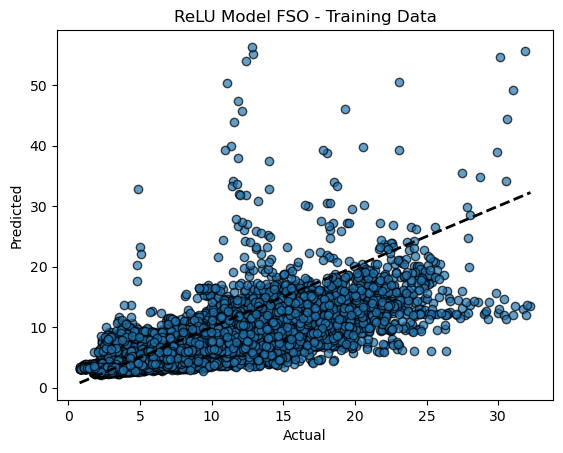

Sigmoid Model FSO - Training Data:


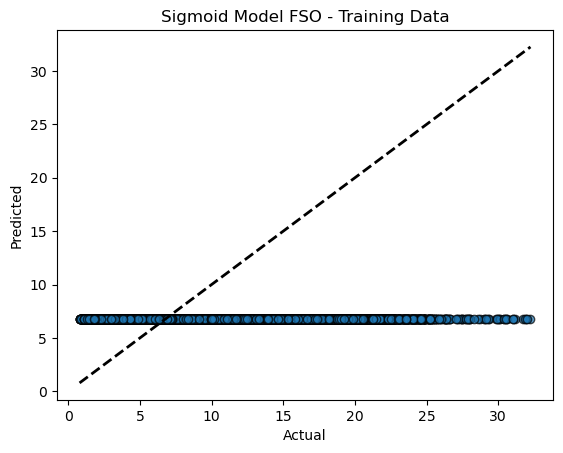

Tanh Model FSO - Training Data:


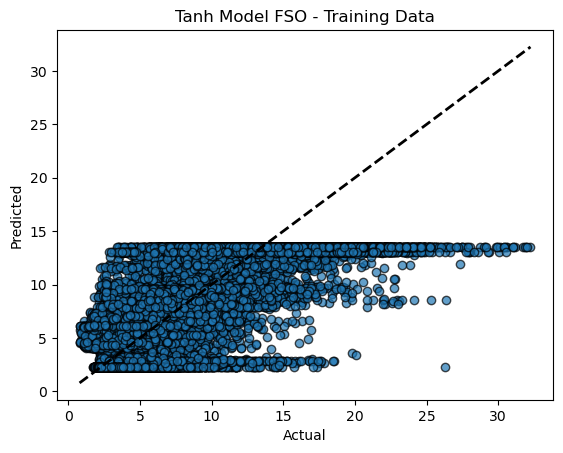

857/857 [==============================] - 1s 909us/step
ReLU_FSO: MAE: 1.5501245637209127 MSE: 5.525214948126457 R²: 0.6308203461330696
Sigmoid_FSO: MAE: 2.9493350642534013 MSE: 14.97238830610645 R²: -0.00041377291284816486
Tanh_FSO: MAE: 1.89910716798153 MSE: 6.644012570167854 R²: 0.5560653686832883
ReLU Model FSO - Test Data:


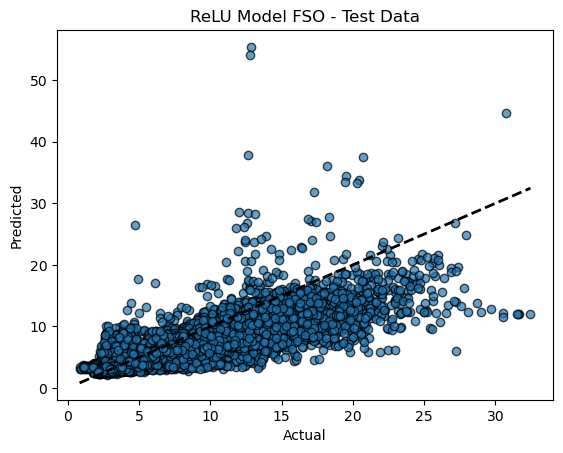

Sigmoid Model FSO - Test Data:


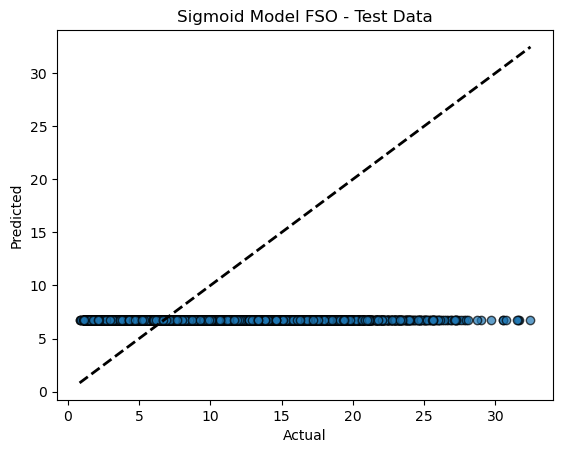

Tanh Model FSO - Test Data:


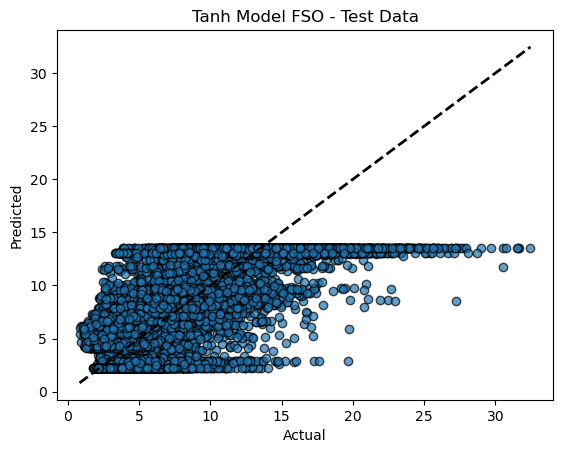

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the train data for FSO
def predict_data_FSO(model, data):
    return model.predict(data).flatten()

y_pred_relu_FSO = predict_data_FSO(best_relu_model_FSO, X_train_FSO)
y_pred_sigmoid_FSO = predict_data_FSO(best_sigmoid_model_FSO, X_train_FSO)
y_pred_tanh_FSO = predict_data_FSO(best_tanh_model_FSO, X_train_FSO)

# Compute the metrics for FSO
def get_metrics_FSO(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, r2

metrics_relu_FSO = get_metrics_FSO(y_train_FSO, y_pred_relu_FSO)
metrics_sigmoid_FSO = get_metrics_FSO(y_train_FSO, y_pred_sigmoid_FSO)
metrics_tanh_FSO = get_metrics_FSO(y_train_FSO, y_pred_tanh_FSO)

print("ReLU_FSO: MAE:", metrics_relu_FSO[0], "MSE:", metrics_relu_FSO[1], "R²:", metrics_relu_FSO[2])
print("Sigmoid_FSO: MAE:", metrics_sigmoid_FSO[0], "MSE:", metrics_sigmoid_FSO[1], "R²:", metrics_sigmoid_FSO[2])
print("Tanh_FSO: MAE:", metrics_tanh_FSO[0], "MSE:", metrics_tanh_FSO[1], "R²:", metrics_tanh_FSO[2])

# Function to plot the actual vs. predicted values for FSO
def plot_actual_vs_predicted_FSO(y_true, y_pred, title):
    plt.figure()
    plt.scatter(y_true, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plotting actual vs. predicted for FSO models
print("ReLU Model FSO - Training Data:")
plot_actual_vs_predicted_FSO(y_train_FSO, y_pred_relu_FSO, 'ReLU Model FSO - Training Data')

print("Sigmoid Model FSO - Training Data:")
plot_actual_vs_predicted_FSO(y_train_FSO, y_pred_sigmoid_FSO, 'Sigmoid Model FSO - Training Data')

print("Tanh Model FSO - Training Data:")
plot_actual_vs_predicted_FSO(y_train_FSO, y_pred_tanh_FSO, 'Tanh Model FSO - Training Data')

# Predict the test data for FSO models
y_pred_relu_FSO = predict_data_FSO(best_relu_model_FSO, X_test_FSO)
y_pred_sigmoid_FSO = predict_data_FSO(best_sigmoid_model_FSO, X_test_FSO)
y_pred_tanh_FSO = predict_data_FSO(best_tanh_model_FSO, X_test_FSO)

# Compute the metrics for the FSO test predictions
metrics_relu_FSO = get_metrics_FSO(y_test_FSO, y_pred_relu_FSO)
metrics_sigmoid_FSO = get_metrics_FSO(y_test_FSO, y_pred_sigmoid_FSO)
metrics_tanh_FSO = get_metrics_FSO(y_test_FSO, y_pred_tanh_FSO)

print("ReLU_FSO: MAE:", metrics_relu_FSO[0], "MSE:", metrics_relu_FSO[1], "R²:", metrics_relu_FSO[2])
print("Sigmoid_FSO: MAE:", metrics_sigmoid_FSO[0], "MSE:", metrics_sigmoid_FSO[1], "R²:", metrics_sigmoid_FSO[2])
print("Tanh_FSO: MAE:", metrics_tanh_FSO[0], "MSE:", metrics_tanh_FSO[1], "R²:", metrics_tanh_FSO[2])

# Plotting actual vs. predicted for FSO test predictions
print("ReLU Model FSO - Test Data:")
plot_actual_vs_predicted_FSO(y_test_FSO, y_pred_relu_FSO, 'ReLU Model FSO - Test Data')

print("Sigmoid Model FSO - Test Data:")
plot_actual_vs_predicted_FSO(y_test_FSO, y_pred_sigmoid_FSO, 'Sigmoid Model FSO - Test Data')

print("Tanh Model FSO - Test Data:")
plot_actual_vs_predicted_FSO(y_test_FSO, y_pred_tanh_FSO, 'Tanh Model FSO - Test Data')


------------------

In [14]:
# ROC AUC

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Predict the train data for FSO
def predict_data_FSO(model, data):
    return model.predict(data).flatten()

y_pred_relu_FSO = predict_data_FSO(best_relu_model_FSO, X_train_FSO)
y_pred_sigmoid_FSO = predict_data_FSO(best_sigmoid_model_FSO, X_train_FSO)
y_pred_tanh_FSO = predict_data_FSO(best_tanh_model_FSO, X_train_FSO)

# Compute the metrics for FSO
def get_metrics_FSO(y_true, y_pred, threshold=0.5):
    y_pred_label = [1 if i > threshold else 0 for i in y_pred]
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_label).ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    return accuracy, sensitivity, specificity, roc_auc

metrics_relu_FSO = get_metrics_FSO(y_train_FSO, y_pred_relu_FSO)
metrics_sigmoid_FSO = get_metrics_FSO(y_train_FSO, y_pred_sigmoid_FSO)
metrics_tanh_FSO = get_metrics_FSO(y_train_FSO, y_pred_tanh_FSO)

print("ReLU_FSO: Accuracy:", metrics_relu_FSO[0], "Sensitivity:", metrics_relu_FSO[1], "Specificity:", metrics_relu_FSO[2], "ROC AUC:", metrics_relu_FSO[3])
print("Sigmoid_FSO: Accuracy:", metrics_sigmoid_FSO[0], "Sensitivity:", metrics_sigmoid_FSO[1], "Specificity:", metrics_sigmoid_FSO[2], "ROC AUC:", metrics_sigmoid_FSO[3])
print("Tanh_FSO: Accuracy:", metrics_tanh_FSO[0], "Sensitivity:", metrics_tanh_FSO[1], "Specificity:", metrics_tanh_FSO[2], "ROC AUC:", metrics_tanh_FSO[3])

# Function to plot the ROC curve for FSO
def plot_roc_curve_FSO(outputs, labels):
    fpr, tpr, _ = roc_curve(labels, outputs)
    roc_auc = roc_auc_score(labels, outputs)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for FSO')
    plt.legend(loc="lower right")
    plt.show()

# Plotting ROC curves for FSO models
print("ReLU Model FSO:")
plot_roc_curve_FSO(y_pred_relu_FSO, y_train_FSO)

print("Sigmoid Model FSO:")
plot_roc_curve_FSO(y_pred_sigmoid_FSO, y_train_FSO)

print("Tanh Model FSO:")
plot_roc_curve_FSO(y_pred_tanh_FSO, y_train_FSO)


1999/1999 [==============================] - 2s 862us/step


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
# Predict the test data for FSO models
y_pred_relu_FSO = predict_data_FSO(best_relu_model_FSO, X_test_FSO)
y_pred_sigmoid_FSO = predict_data_FSO(best_sigmoid_model_FSO, X_test_FSO)
y_pred_tanh_FSO = predict_data_FSO(best_tanh_model_FSO, X_test_FSO)

# Compute the metrics for the FSO test predictions
metrics_relu_FSO = get_metrics_FSO(y_test_FSO, y_pred_relu_FSO)
metrics_sigmoid_FSO = get_metrics_FSO(y_test_FSO, y_pred_sigmoid_FSO)
metrics_tanh_FSO = get_metrics_FSO(y_test_FSO, y_pred_tanh_FSO)

print("ReLU_FSO: Accuracy:", metrics_relu_FSO[0], "Sensitivity:", metrics_relu_FSO[1], "Specificity:", metrics_relu_FSO[2], "ROC AUC:", metrics_relu_FSO[3])
print("Sigmoid_FSO: Accuracy:", metrics_sigmoid_FSO[0], "Sensitivity:", metrics_sigmoid_FSO[1], "Specificity:", metrics_sigmoid_FSO[2], "ROC AUC:", metrics_sigmoid_FSO[3])
print("Tanh_FSO: Accuracy:", metrics_tanh_FSO[0], "Sensitivity:", metrics_tanh_FSO[1], "Specificity:", metrics_tanh_FSO[2], "ROC AUC:", metrics_tanh_FSO[3])

# Plotting ROC curves for FSO test predictions
print("ReLU Model FSO:")
y_pred_relu_FSO = best_relu_model_FSO.predict(X_test_FSO).ravel()  # Ensure predictions are for the FSO model
plot_roc_curve_FSO(y_pred_relu_FSO, y_test_FSO)

print("Sigmoid Model FSO:")
y_pred_sigmoid_FSO = best_sigmoid_model_FSO.predict(X_test_FSO).ravel()  # Ensure predictions are for the FSO model
plot_roc_curve_FSO(y_pred_sigmoid_FSO, y_test_FSO)

print("Tanh Model FSO:")
y_pred_tanh_FSO = best_tanh_model_FSO.predict(X_test_FSO).ravel()  # Ensure predictions are for the FSO model
plot_roc_curve_FSO(y_pred_tanh_FSO, y_test_FSO)
